# Språkmodellering: litt teori

## Hva er en språkmodell?

En språkmodell er simpelthen en sannsynlighetsdistribusjon over setninger. Det vil si at det er en modell som kan fortelle oss hvor sannsynlig en setning som "_Sola skinner._" er og hvor sannsynlig en setning "_Regnet skinner._" er.

Hva mener vi egentlig når vi snakker om _sannsynligheten_ til en setning? Teoretisk er dette litt uklart, men i praksis betyr det at vi har et _referansekorpus_ som er sampla fra den uendelige populasjonen av setninger som vi er interessert i og som vi kan bruke til å beregne sannsynlighetene til forskjellige setninger. Vi setter da sannsynligheten til f.eks. et ord til å være lik den relative frekvensen til det ordet. Dette kalles _Maximum Likelihood Estimation_ (MLE). Hvis f.eks. ordet _et_ utgjør 0.6% av ordene i referansekorpuset, sier vi at det ordet har 0.6% sannsynlighet. Men ords sannsynlighet avhenger jo av _konteksten_ og dette gjør beregnigenen mer kopmliserte, som vi skal se.

Det er en annen komplikasjon også: denne måten å estimere sannsynligheter på innebærer at vi setter sannsynligheten like 0 for alle ord vi ikke observerer i referansekorpuset. Men vi vet jo at et nytt korpus av en viss størrelse kan inneholde ord vi ikke så i referansekorpuset. Med andre ord overvurderer MLE sannsynligheten til de ordene vi ser i referansekorpuset og undervurderer sannsynligheten til ting vi ikke så. Det finnes forskjellige teknikker som kalles _glatting_ (engelsk _smoothing_) for å håndtere dette, men vi går ikke inn på det her.

Språkforskere har vært interessert i språkmodeller lenge, f.eks. fordi man har tenkt seg at de kunne være tilnærminger til/modeller av vår språklige kompetanse. Det var dette Chomsky argumenterte _mot_ i _Syntactic Structures_, s. 16 da han kontrasterte følgende to setninger:

(1) _Colorless green ideas sleep furiously._

(2) _Furiously sleep ideas green colorless._

Chomsky hevda (med god rett i 1957) at ingen av disse setningene hadde forekommet i engelsk før hans bok. Han hevda også (med mye mindre god rett) at en språkmodell derfor ville regne begge to som like (u)sannsynlige og ikke kunne skille mellom dem, på tross av at (1) er en velforma, men menigsløs setning, mens (2) er en ugrammatisk setning.

Språkmodeller har hatt mange praktiske anvendelser. For eksempel kan et talegjenkjenningssystem, eller en OCR-leser eller et maskinoversettelsessystem ha god bruk for å vite om en bestemt setning er mer sannsynlig enn en annen, hvis det auditive eller visuelle signalet er uklart, eller kildespråksetningen er tvetydig. Et rettskrivingsprogram kan åpenbart ha brukt en språkmodell (hva er det sannsynlig at du mente å skrive her?) Og i det siste har altså språkmodellene blitt så gode at de kan generere plausible eksamensbesvarelser.

## Litt grunnleggende sannsynlighetsregning

Den helt naive tilnærmingen ville være å estimere setningsssannsynligheter med MLE på samme måte som vi gjorde med ord over. Da teller vi opp hvor mange ganger hver enkelt setning forekommer i referansekorpuset vårt, deler på det totale antallet setninger og tar det som et estimat på hvor sannsynlig setningen er. Da vil selvfølgelig _Colorless green ideas sleep furiously_ og _Furiously sleep ideas green colorless_ være like usannsynlige (hvis referansekorpuset vårt er fra før 1957) fordi ingen av setningene forekommer der.

Problemet er at de aller fleste setningene vil være unike, nesten uansett hvor stort korpuset vårt er. Med andre ord må vi bryte ned setningen i mindre deler som forekommer oftere. En naturlig tanke - for en lingvist i alle fall - er å dele setningen opp i ord, siden det finnes mange færre ord enn setninger, og hvert av dem forekommer oftere.

Hvis vi ønsker å bruke ord til å estimere sannsynligheten til setninger, er det naturlig å estimere sannsynligheten til hvert ord _gitt de foregående ordene_. Vi behandler da setningsstart og -slutt som spesielle ord `<s>` og `</s>`. Sannsynligheten for at et ord skal begynne en setning er da sannsynligheten for at det skal følge etter `<s>`, som vi skriver slik:
    
    
$P$(sola|`<s>`)

Sannsynligheten for setningen "_Sola skinner._" blir da
    
$P$(sola|`<s>`) $\cdot\ P$(skinner|`<s>`, sola) $\cdot\ P$($`<\s>`|`<s>`, sola, skinner)

Det vi gjør her er å bruke kjederegelen for sannsynligheter. Betingede sannsynligheter er definert som følger:

$P(B|A)=\frac{P(A\&B)}{P(A)} $
    
som vi kan skrive om slik:

$P(A\&B)=P(B|A)\cdot P(A)$

og slik fortsetter det:

$P(A\&B\&C\&D\&E)=P(E|A\&B\&C\&D)P(D|A\&B\&C)P(C|A\&B)P(B|A)P(A)$



Men vi ser at vi fremdeles har samme problemet. For å beregne sannsynligheten til (1) trenger vi sannsynligheten for at _furiously_ forekommer etter _Colorless green ideas sleep_.

$P($furiously|`<s>`, colorless, green, ideas, sleep)

Denne vil nok være lik sannsynligheten for at _colorless_ kommer etter _Furiously sleep ideas green_, nemlig nokså nært null. Mer generelt har vi ikke løst problemet med at de fleste setninger er unike.

Vi bruker derfor en tilnærming og antar at sannsynligheten for et ord kun avhenger av et visst vindu av de foregående ordene. Dette kan vi tenke på som _kontekstvinduet_ til modellen.

## Markov-antakelsen

Dette kalles en _Markov-antakelse_: neste hendelse avhenger kun av den tilstanden vi er i. Oversatt til ordrekkefølger: hva som er det neste ordet avhenger kun av det foregående ordet. Prosessen har ingen "hukommelse". Sannsynligheten til "_Sola skinner._" blir da

$P$(sola|`<s>`) $\cdot\ P$(skinner|sola) $\cdot\ P$($`<\s>`|skinner)

Sannsynligheten til hvert ord er bare betinga av det direkte foregående. For Chomskys eksempler trenger vi da bare sannsynligheten for at _furiously_ forekommer etter _sleep_.

En model som denne kalles en _bigram-modell_, fordi vi kun ser på sekvenser av to ord (bigram) av gangen. Vi kunne gå et skritt lenger å bruke en _unigram_-modell. Da antar vi at ordenes sannsynligheter er uavhengige av hverandre, og vi kan beregne sannsynligheten til  "_Sola skinner._" slik

$P$(sola) $\cdot\ P$(skinner) $\cdot\ P$($`<\s>`)

Mer generelt snakker vi om $n$-gram-modeller, hvor $n$ altså er antallet ord vi ser på av gangen. Som Chomsky påpekte er $n$-gram-modeller teoretisk utilstrekkelige for å beskrive menneskelige språk, fordi de kan inneholde avhengigheter som i prinsippet er av ubegrenset lengde (_unbounded dependencies_). For eksempel er _hvem_ objekt for _ansatte_ i denne setningen:

_Hvem sa du at Per hadde sagt at Kari trodde at Jon hadde drømt at dekanen ansatte?_

Vi ser at dersom vi bytter ut _ansatte_ med _sa_, må vi også bytte ut _Hvem_ med _Hva_ for å få en god setning. For å forstå slike sammenhenger, må altså språkmodellen se 16 ord bakover. Moderne, nevrale språkmodeller klarer fint dette - BERT har et vindu på 512 ord og forskjellige varianter av ChatGPT har vinduer på mange tusen ord, GPT4 Turbo så mange som 128.000. For de enkle $n$-gram-modellene vi ser på her, blir det umulig å estimere slike sannsynligheter. Det kan vi se f.eks. av dataene fra [Googles $n$-gram-korpus](https://research.google/blog/all-our-n-gram-are-belong-to-you/).

| Number of  |                   |
| :--------- | ----------------: |
| tokens:    | 1,024,908,267,229 |
| sentences: |    95,119,665,584 |
| unigrams:  |        13,588,391 |
| bigrams:   |       314,843,401 |
| trigrams:  |       977,069,902 |
| fourgrams: |     1,313,818,354 |
| fivegrams: |     1,176,470,663 |

13 millioner unike ord (unigram) skulle gi $1300000^5 \approx 10^{35}$ mulige femgram. Selv om mange av disse er ikke er velformede kombinasjoner av fem ord, ser vi at vi har et mye mindre representativt utvalg av femgramenn av f.eks. bi- eller trigram, som gjør at de estimerte sannsynlighetene blir dårligere. Vi må derfor avveie behovet for å fange avhengigheter over en viss distanse mot kvaliteten på sannsynlighetene. I praksis kan $n$-gram-modeller bli ganske gode tilnærminger fordi de fleste avhengighetene er lokale, i alle fall når vi tenker på grammatisk velformethet. Hvis vi tenker på _betydning_ blir bildet et annet: hva som er et meningsfullt _svar_, f.eks., avhenger selvfølgelig av hva _spørsmålet_ er. Derfor er det store kontekstvinduet helt essensielt for at vi kan oppleve å ha en meningsfull "samtale" med ChatGPT, mens språkmodeller av $n$-gram-typen først og fremst ble brukt til ting som automatisk korrektur o.l.


## Sannsynligheten for et n-gram

Gitt Markov-antakelsen, forenkler vi sannsynligheten av en sekvens av fem ord på følgende vis i en bigram- og en unigrammodell:

$P(A\&B\&C\&D\&E) \approx P(E|D)P(D|C)P(C|B)P(B|A)P(A)$

$P(A\&B\&C\&D\&E) \approx P(E)P(D)P(C)P(B)P(A)$

Hvordan beregner vi så hvor sannsynlig f.eks. et bigram er, altså f.eks. $P(B|A)$? Jo det er sannsynligheten for det andre ordet, gitt det første. Sagt på en annen måte: sannsyngliheten for at _sola_ skal etterfølges av _skinner_ er lik andelen av forekomstene av _sola_ som etterfølges av _skinner_.

$P$(skinner|sola)=$\frac{c(sola, skinner)}{c(sola)}$

Vi ser at dette bygger på samme prinsippet, sannsynlighetsmaksimering eller MLE, som var det vi brukte for å slutte fra relativ frekvens av enkeltord i et korpus til dets sannsynlighet. 


# Implementasjon av en språkmodell

##  Hente treningstekster fra Nasjonalbiblioteket

Som vi har sett trenger vi et referansekorpus for å beregne sannsynligheten av $n$-gram. Her skal vi bruke tekster fra Nasjonalbibliotekets frie samling. Som mange vet, kan man lese mye eldre norsk litteratur på [https://bokhylla.no](https://bokhylla.no). Her finner vi f.eks. [et utvalg av Ibsen-tekster](https://www.nb.no/items/URN:NBN:no-nb_digibok_2010082422009). Men når vi skal jobbe maskinelt med tekstene, må vi bruke rentekstvarianter. Det kan vi hente på URLer som [https://api.nb.no/dhlab/freetext/get_text?urn=URN:NBN:no-nb_digibok_2010070206070].

I python kan vi bruke biblioteket [`requests`](https://pypi.org/project/requests/) til å sende http-forespørsler med funksjonen `get()`. Da får vi et responsobjekt tilbake, som vi kan lagre i en variabel og inspisere på forskjellig vis.

In [ ]:
import requests
res = requests.get("https://api.nb.no/dhlab/freetext/get_text?urn=URN:NBN:no-nb_digibok_2010070206070")
print(res.status_code)

`status_code` gir oss en kode som viser hvordan forespørselen gikk. 200 betyr at alt gikk bra, så den pleier vi ikke å se i en nettleser. Dersom vi forsøker å hente en URL som ikke eksisterer, får vi status kode 404, som er mer kjent. `content` gir oss innholdet vi fikk tilbake fra nettet.

In [ ]:
print(res.content)

Men vi ser at det ser litt uryddig ut, vi har mange koder som `\\u00e6` o.l. hvor vi ville forvente `æ`, `ø` osv. Her er det mange detaljer vi ikke skal gå inn på, men vi kan rydde opp ved å fortelle maskinen at den skal lese strengen som unicode

In [ ]:
print(res.content.decode('unicode_escape'))

Det ser fremdeles ikke ideelt ut. Det er mye støy her som stammer fra OCR-lesningen. Men det må vi bare leve med. 
 
Siden vi skal laste ned flere tekster, pakker vi inn det vi har gjort hittil i en funksjon. Vi abstraherer ut det eneste vi trenger å variere for å hente forskjellige tekster, nemlig [URN](https://www.nb.no/tjenester/standardnummerering/urn/kva-er-urn/) og definerer en funksjon som tar URNen som argument, sjekker om den får noe svar, og i så fall returnerer teksten som unicode.

In [ ]:
import requests

def get_text(urn):
    res = requests.get(f"https://api.nb.no/dhlab/freetext/get_text?urn={urn}")
    if res.status_code == 200:
        result = res.content.decode('unicode_escape')
    else:
        result = ""
    return result

La oss sjekke hvordan det fungerer:

In [ ]:
get_text("URN:NBN:no-nb_digibok_2010070206070")

Legg merke til at NB har mange tekster som de ikke har lov til å dele på grunn av opphavsrettigheter:

In [ ]:
get_text("URN:NBN:no-nb_digibok_2021082748580")

Da får vi ikke tak i teksten. Men et mer presserende problem er: hvordan får vi tak i disse URN-kodene? Det går an å lete rundt på [Nasjonalbibliotekets sider](https://www.nb.no/search) etter de bøkene vi er ute etter. Når du har funnet den, klikker du på "opplysninger" for å finne URNen. Men dette tar tid, så vi kan i stedet bruke Nasjonalbibliotekets API "dhlab" for å hente ut lister med URNer. Først sikrer vi oss at dhlab er installert og importert slik at vi kan bruke det.

In [ ]:
# Når en linje starter med utropstegn betyr det at den skal kjøres i en terminal, ikke i Python
!pip install dhlab
import dhlab as dh

Ved hjelp av dhlab APIet kan vi søke opp URNer basert på bibliografiske metadata. Det følgende søket finner bøker med forfatter Henrik Ibsen utgitt før 1950 og skrevet på bokmål (`nob`), slik at vi ikke får oversettelser.

In [ ]:
c = dh.Corpus(doctype="digibok", author="Henrik Ibsen", title="Samlede verker", to_year = 1950, lang="nob", limit=1000).frame
c

Vi ser at det dreier seg om den gamle Ibsen-utgaven til Bull, Koht og Seip. Nå kan vi få tak i teksten til et av verkene vi fant.

In [ ]:
solness_urn = c[c["title"].str.contains("Solness")].urn.values[0]
print(solness_urn)

In [ ]:
x = get_text(solness_urn)
x

`x` inneholder altså teksten til Byggmester Solness. Men legg merke til at teksten er en eneste lang streng. Det neste steget er derfor å dele den opp i setninger og ord. Til dette bruker vi biblioteket nltk ([Natural language toolkit](https://www.nltk.org/)).

In [ ]:
!pip install nltk
import nltk
nltk.download("punkt_tab")

solness = [nltk.word_tokenize(s, language="norwegian") for s in nltk.sent_tokenize(x, language = "norwegian")]
solness

La oss se på en av setningene våre:

In [ ]:
s = solness[156]
s

Hvordan kan vi gjøre dette om til n-gram? Vi kunne skrive koden selv, men nltk har en funksjon for oss. Du kan teste ut forskjellige verdier for $n$ her:

In [ ]:
from nltk.util import ngrams
print(list(ngrams(s, n=2)))

Hva med disse start- og sluttsymbolene vi sa vi trengte? (`<s>` og `</s>`). Igjen kunne vi skrive kode selv, men nltk har en funksjon også for dette.

In [ ]:
from nltk.util import pad_sequence
list(pad_sequence(s, pad_left=True, left_pad_symbol="<s>",
                  pad_right=True, right_pad_symbol="</s>",
                  n=3))

For å få alle n-grammene, med padding, kan vi da slå sammen de to metodene:

In [ ]:
padded_sequence = (pad_sequence(s, pad_left=True, left_pad_symbol="<s>",
                  pad_right=True, right_pad_symbol="</s>",
                  n=3))
list(ngrams(padded_sequence, n=3))

Dersom vi gjør dette for alle setninger i teksten og teller opp frekvensen til de forskjellige n-grammene, kan vi lage en språkmodell slik vi beskrev over.

##  Implementasjon av en $n$-gram-modell

Imidlertid har NLTK ferdige funksjoner for å trene n-gram-modeller, uten at vi må skrive all koden for å beregne sannsynligheten selv. Her skal vi gå gjennom helt grunnleggende ting om n-gram-modeller i NLTK, du kan lese mer [her](https://www.nltk.org/api/nltk.lm.html). 

Først ekstraherer vi alle n-grammene med start- og sluttsymboler. `padded_everygram_pipeline()` gjør dette for oss.

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
train, vocab = padded_everygram_pipeline(3, solness)

Legg merke til at `padded_everygram_pipeline()` returnerer to ting: `train` som er en liste med alle n-gram, og `vocab` som er en liste med alle enkeltordene i teksten. Vi trenger begge deler for å trene n-gram-modellen vår. Selve treningen gjør vi på følgende måte:

In [ ]:
from nltk.lm import MLE
lm = MLE(3)
lm.fit(train, vocab)

Argumentet til `MLE()` er størrelsen på n-grammene, så 3 gir oss en trigrammodell.

Vi kan bruke språkmodellen på forskjellige måter. For eksempel kan vi få ut frekvensen av bestemte ord, eller evt. scoren - dvs. sannsynligheten, som altså er den relative frekvensen til ordet siden vi bruker en LME-modell.

In [ ]:
print(lm.counts["Solness"])
print(lm.score("Solness"))
print(lm.counts["Kaja"])
print(lm.score("Kaja"))

Hele poenget med en trigrammodell er at vi kan se på ords frekvens i konteksten av det foregåendene ordet. Det kan vi gjøre ved å gi `lm.score()` to argumenter, først det ordet vi er interessert i, og deretter en liste som inneholder konteksten. Den første linja under gir oss sannsynligheten til sluttsymbolet `</s>` . Den andre linja gir oss sannsynligheten til sluttsymbolet `</s>` _gitt at det forrige tokenet var et punktum_. Den tredje linja gir oss sannsynligheten  for `</s>` etter et komma.

In [ ]:
print(lm.score("</s>"))
print(lm.score("</s>", ["."]))
print(lm.score("</s>", [","]))

Vi ser at sluttsymbolet er mye mer sannsynlig etter et punktum enn det er generelt (på tvers av alle slags kontekster). Vi ser også at sluttsymbolet aldri forekommer etter komma. (Husk at i ren sannsynlighetsmaksimering gir vi sannsynlighet 0 til alle sekvenser som ikke forekommer i treningskorpuset.) Neste linje gir oss frekvensen til ordet "Kaja" i begynnelsen av setninger:

In [ ]:
print(lm.score("Kaja", ["<s>"]))

Vi kan også bruke språkmodeller til å _generere_ tekst ut fra sannsynlighetsfordelingen, men før vi gjør det skal vi putte sammen koden vi har så langt i én funksjon som tar et korpus, slik det kommer ut av dhlab APIet, og returnerer en språkmodell. For å få til det må vi iterere over URNene i korpuset og for hver URN hente teksten og tokenisere den. Deretter lager vi en språkmodell over alle de tokeniserte tekstene. 

In [ ]:
def tokenized_text(corpus):
    tokenized_text = []

    for urn in corpus.urn.values:
        x = get_text(urn=urn)
        if x != '{"error":"Text is not free to use"}\n':
            tokenized_text += [nltk.word_tokenize(s, language="norwegian") for s in nltk.sent_tokenize(x, language = "norwegian")]
    return tokenized_text

def language_model(tokenized_text, n=3):
    train, vocab = padded_everygram_pipeline(n, tokenized_text)
    lm = MLE(n)
    lm.fit(train, vocab)
    return lm

Vi kan nå bruke denne funksjonen til å trene en språkmodell over Ibsen-korpuset vi lagret i variabelen `c` over. Først henter vi ut den tokeniserte teksten og sjekker hvor lang den er (målt i antall setninger og tokens):

In [ ]:
text = tokenized_text(c)
print("Antall setninger", len(text))
print("Antall tokens", len(list(t for s in text for t in s)))

In [ ]:
%%time
# Dette tar litt tid, ca. 40 sekunder
lm = language_model(text)

## Å generere med $n$-gram-modeller

Som vi lærte tidligere, er en språkmodell en sannsynlighetsdistribusjon over ord (unigram), eller over ord betinget av foregående ord (bi-, tri-, tetragram-modeller). Vi kan trekke tilfeldig fra denne distribusjonen og på den måten generere tekst. Dette gjøres med funksjonen `generate(n)`, hvor  $n$ er lengden på sekvensen som skal genereres. Siden vi trekker tilfeldig fra en distribusjon, får vi stort sett forskjellige resultater hver gang vi kjører denne funksjonen.

In [ ]:
lm.generate(10)

Akkurat som med `score()` kan vi spesifisere en kontekst for sekveksen som skal genereres. F.eks. kan vi be om sekvenser med lengde 10 som følger etter startsymbolet, altså er begynnelser av setninger.

In [ ]:
lm.generate(10, ["<s>"])

Vi ser at vi får nokså velformede setninger, selv om det stadig går galt på et eller annet vis. Vi ser også at vi ofte får setninger som er gjenkjennelig ibsenske. Vi kan også se hvordan konteksten spiller en rolle. I følgende kodesnutt genererer vi 10 sekvenser av 15 tokens som skal følge etter en startsymbolet og navnet på en Ibsen-karakter. Vi gjør dette for tre forskjellige karakterer, Agnes (fra _Brand_), Inger (til Østråt) og Hjalmar (fra _Vildanden_). For å gjøre det mer lesbart skriver vi ut resultatet som en streng, ikke som en liste:

In [ ]:
for role in ["Agnes", "Inger", "Hjalmar"]:
    print(role)
    for i in range(10):
        seq = lm.generate(12, ["<s>", role])
        print("\t" + " ".join(seq))

Vi ser at ordet _Inger_ har en sterk dragning mot _Gyldenløve_, mens _Agnes_ og _Hjalmar_ oftere etterfølges av parenteser som gir sceneanvisninger. Dette er kjernen i den mekanismen som også får mer avanserte språkmodeller, som ChatGPT, til å tilpasse teksten sin til den konteksten vi gir den. Men vår trigrammodell har en veldig begrenset kontekst, de to foregående ordene, så det er ikke vanskelig å få den til å generere setninger som ender opp med å nevne en annen karakter fra et annet Ibsen-skuespill.

(I parentes bemerket virker Ingers dragning mod Gyldenløve noe overdrevet. Hvorfor får vi aldri _til_ f.eks.? Noe virker litt rart med `generate()`-funksjonen.) 

In [ ]:
print(lm.score("Gyldenløve", ["Inger"]))
print(lm.score("til", ["Inger"]))
print(lm.generate(15, ["Inger", "til"]))

## En språkmodell for offentlige utredninger

Nå lager vi en språkmodell basert på offentlige utredninger i NB-arkivet. Blir den forskjellig fra Ibsen-modellen? Først henter vi tekstene:

In [ ]:
nou_corpus = dh.Corpus(title="Offentlig utredning", to_year = 2890, limit=2000).frame
nou_corpus

Deretter lager vi noen språkmodeller basert på dette korpuset: en basert på unigram, en annen på bigram og en tredje på trigram.

In [ ]:
%%time
#2.5 minutes
nou_text = tokenized_text(nou_corpus)
nou_model1 = language_model(nou_text, n = 1)
nou_model2 = language_model(nou_text, n = 2)
nou_model3 = language_model(nou_text, n = 3)

Nå genererer vi fem setninger med hver av modellene:

In [ ]:
for i, model in enumerate([nou_model1, nou_model2, nou_model3]):
    print(f"Genererer med {str(i+1)}-gram-modellen:")
    for j in range(5):
        print("\t" + " ".join(model.generate(12, ["<s>"])))

Vi ser at når modellene tar en større kontekst i betraktning, øker sjansen for at vi får noenlunde grammatiske setninger ut av dem. Men det er noe annet som skjer også: treningsmaterialet blir mindre og mindre representativt for mulighetene som faktisk finnes. La oss først se hvor mange forskjellige tokens som finnes i NOU-korpuset:

In [ ]:
print("Antall setninger", len(nou_text))
flat_text = list(t for s in nou_text for t in s)
print("Antall ord", len(flat_text))
print("Antall unike ord", len(set(flat_text)))        

Blant de litt over tre millionene ord i korpuset vårt finner vi litt over 112.000 ord. Det er ikke alle ordene i norsk - [språkrådet anslår](https://www.sprakradet.no/svardatabase/sporsmal-og-svar/antall-ord-i-norsk/) at det finnes rundt 300.000 ord. Men fordi korpuset vårt er tredve ganger større enn antall unike ord det inneholder, kan vi gå ut fra at de fleste vanlige ord forekommer med en frekvens som henger sammen med hvor frekvente de er i denne typen tekst. Men hva med bi- og trigrammene? Et par kjappe regnestykker viser at det fins veldig mange mulige slike bare basert på et grunnvokabular på 112.000 ord:

In [ ]:
print("Mulige bigram:", 112000**2)
print("Mulige trigram:", 112000**3)

Grunnvokabularet vårt åpner for over 12 milliarder mulige bigram og over én billiard mulige trigram. Men korpuset vårt inneholder ikke vesentlige mange flere bigram eller trigram enn det har ord. Med andre ord har vi et veldig mye dårligere grunnlag for å estimere sannsynlighetene for bigram eller trigram - med mindre vi utvider korpuset voldsomt. Hvis ikke vi gjør det, blir referansekorpuset mindre og mindre representativt for noe annet enn seg selv. Og det betyr at når vi genererer fra en språkmodell basert på referansekorpuset, øker sjansene for at vi genererer noe som faktisk forekommer i korpuset. La oss først se på hva vi får om vi genererer med en trigram modell i konteksten "Forskning viser":

In [ ]:
nou_model3.generate(10, ["<s>", "Forskning", "viser"])

In [ ]:
nou_model3.score("at", ["Forskning", "viser"])

Men hva om vi går opp til en 5-grammodell?

In [ ]:
nou_model5 = language_model(nou_text, 5)

In [ ]:
nou_model5.generate(10, ["<s>", "Forskning", "viser"])

Når vi kjører koden i cellen over noen ganger, ser vi at det ikke er så mange forskjellige setninger som genereres. Grunnen er at 5-gram er (så godt som) unike i korpuset: i konteksten "`<s>` Forskning viser at" forekommer bare ordene _økt_ og _innvandrere_, hver med sannsynlighet 0.5:

In [ ]:
nou_model5.score("økt", ["<s>", "Forskning", "viser", "at"])

In [ ]:
nou_model5.score("innvandrere", ["<s>", "Forskning", "viser", "at"])

Videre, etter "Forskning viser at økt" forekommer bare _marginalskatt_ og etter "Forskning viser at innvandrere" forekommer bare _har_.

In [ ]:
nou_model5.score("marginalskatt", ["Forskning", "viser", "at", "økt"])

In [ ]:
nou_model5.score("har", ["Forskning", "viser", "at", "innvandrere"])

## Perpleksitet

_Perpleksitet_ er et mål på hvor "overrasket" modellen er over å se en bestemt sekvens. Vi går ikke inn på detaljene her, men for de som vil vite er perpleksiteten av en sekvens gitt en modell det (geometriske) gjennomsnittet av de inverse sannsynlighetene til $n$-grammene i sekvensen. Nøkkelordet her er _invers sannsynlighet_: altså, jo mer sannsynlig en sekvens er, jo mindre perpleks blir modellen av å se den.

Poenget med en språkmodell, hvis vi f.eks. skal bruke den til autokorrektur, er jo at den skal modellere språket godt, være en god representasjon av språket. Det betyr at vi ønsker at vi ønsker at modellen gir lav perpleksitet til setninger i språket. Derfor bruker vi ofte perpleksitet som et mål på kvaliteten. Og vi kan lett se at $n$-gram-modellene blir bedre ettersom $n$ øker. 

In [ ]:
sentence = ['Forskning', 'viser', 'at', 'innvandrere', 'har', 'dårligere', 'helse',
 'enn', 'resten', 'av', 'befolkningen', '.'] 

# kommenter ut for å kaste om på ordrekkefølger
import random
random.shuffle(sentence)

print(sentence)
for n, model in [(1, nou_model1), (2, nou_model2), (3, nou_model3), (5, nou_model5)]:
    print(n)
    text = ["<s>"] * (n-1) + sentence + ["</s>"] * (n-1)  
    grammer = list(ngrams(text, n=n))
    print(f"Perpleksitet i {n}-grammodellen", model.perplexity(grammer) )
    for gram in grammer:
        print(f"\t", gram, model.perplexity([gram]))

In [ ]:
nou_model5.perplexity([('<s>', '<s>', 'Forskning', 'viser', 'ikke')])

Vi har juksa litt her, for vi har jo testa perpleksiteten på en setning som vi visste fantes i treningskorpuset. Og vi har jo sett at høye $n$-gram-modeller nærmest "memorerer" treningsdataene og ikke generere andre setninger enn de som fantes i treningskorpuset, dvs. de er egentlig _overtilpassa_. Perpleksiteten er for lav, så å si. Derfor er det god praksis å teste modeller på et _annet_ korpus enn det vi brukte til å trene dem for å se hvor godt de generaliserer. Men da er man også nødt til å bruke teknikker for å gi sannsynligheter til sekvenser vi ikke har observert, så vi lar det ligge her.

Perpleksitet kan også brukes til andre ting enn å evaluere språkmodeller. Den er jo et mål på hvor overraskende et ord eller en ordsekvens er gitt konteksten (og et treningskorpus) og kan derfor brukes til tekstanalyse. Vi kommer tilbake til det.

## BERT-modeller

De språkmodellene som ligger til grunn for såkalt kunstig intelligens bygger i bunnen på samme prinsipp som modellene vi akkurat trente. Hvordan kan de da bli så gode? Det er flere grunner til det:

- de ser på en mye større kontekst og har en mer sofistikert modell for avhengigheter mellom ord
- de behandler ikke ord som diskrete atomer, men som mange-dimensjonale vektorer
- de trenes de på enorme korpus

Denne figuren, fra [BERT-artikkelen](https://aclanthology.org/N19-1423/) viser grunntrekkene av hva som foregår under treningen av en BERT-modell.
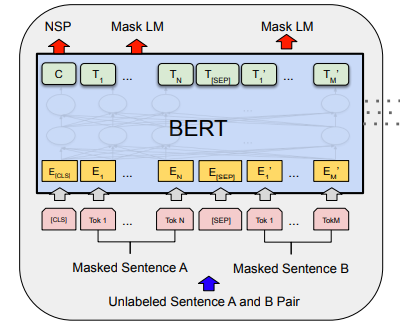

Vi ser at kontekstvinduet består av to setninger, og at alle ordene brukes som kontekst for hverandre: konteksten er altså ikke begrenset til et sett av foregående tokens. Men når alle ordene i begge setningene er kontekster for hverandre, får modellen implisitt informasjon om det neste tokenet - det vil altså være trivielt å forutsi det neste tokenet slik vi gjorde i $n$-gram-modellering. Det vi i stedet gjør er å _maskere_ (gjemme) noen av tokenene, og så be modellen gjette hva de er. 

Et annet triks som brukes er at ord representeres som mange-dimensjonale vektorer ('embeddings'). Dette gjør at ord som "likner på hverandre" i den forstand at de har relativt lik distribusjon, kan gis relativt like vektorrepresentasjoner. For en n-gram-modell er _katt_ og _hund_ bare to forskjellige ord, som gjør at det ikke er noen overføringsverdi mellom trigram som inneholder _katt_ og trigram som inneholder _hund_. For BERT er de to ordene relativt like, og modellen kan overføre ting den vet om typiske kontekster for _katt_ til typiske kontekster for _hund_. Dette gjør det mye lettere å lære over større kontekstvinduer. Det er litt vanskelig å ta inn over seg hva det vil si å representere ord som vektorer, men vi kan få et inntrykk fra visualiseringer som [https://projector.tensorflow.org/](https://projector.tensorflow.org/).

Sist, men ikke minst er altså disse modellene trent på mye større korpus enn det man typisk har brukt for $n$-gram-modellering. Den norske BERT-modellen er f.eks. trent på omtrent [sju milliarder ord](https://github.com/NBAiLab/notram?tab=readme-ov-file#norwegian-colossal-corpus). 

Å trene slike modeller krever veldig mye regnekraft, så vi bruker forhåndstrente ('pretrained') modeller. Det er også den vanlige framgangsmåten. Men ofte tilpasser ('finetune') man en slik modell med tanke på en spesiell oppgave. Her gjør vi heller ikke det, men tester rett og slett ut BERTs evne til å fylle inn maskerte tokens i setninger vi gir den, som er den oppgaven den opprinnelig er trent for. Siden BERT ser på konteksten både til venstre og høyre, kan vi ikke bruke den som en vanlig språkmodell til å generere setninger.

Vi bruker BERT-modellen gjennom HuggingFace-biblioteket `transformers`. Først sikrer vi at det er installert, deretter importerer vi det.

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
import transformers
from transformers import pipeline

Når biblioteket er importert, kan vi laste inn modeller fra HuggingFace simpelthen ved å gi navnet på modellen. F.eks. har Nasjonalbiblioteket sluppet [en norsk BERT-modell](https://huggingface.co/NbAiLab/nb-bert-base) som heter 'NbAiLab/nb-bert-base'. Denne kan vi bruke i en pipeline som gjetter maskerte token. Først setter vi opp pipelinen:

In [ ]:
import torch
unmasker = pipeline('fill-mask', model='NbAiLab/nb-bert-base')

Når det er gjort, kan vi fore pipelinene med setninger hvor ett token er maskert, og be modellen gjette hvilke ord som passer best. På den måten kan vi f.eks. sjekke om den forstår hvilke pronomen som skal brukes for å referere til forskjellige personer.

In [ ]:
unmasker("Peter roste Maria fordi [MASK] hadde gjort en god jobb.")

Vi ser at vi får ut forskjellige forslag med en `score`, dvs. en sannsynlighet. Dette er altså akkurat det samme som vi fikk ut av $n$-gram-modellene våre, bare beregnet på en veldig mye mer sofistikert måte og med et større treningskorpus. 

In [ ]:
unmasker("Maria roste Peter fordi [MASK] hadde gjort en god jobb.")

Vi ser at BERTs sannsynligheter samsvarer med våre intuisjoner. Det som foregår her, er egentlig ganske komplisert: ikke bare må BERT forstå at _Maria_ er en _hun_ og _Peter_ en _han_, men også at _fordi_-setningen sannsynligvis har oversetningens objekt som sitt subjekt. Hvis $X$ roser $Y$, er det typisk pga. noe $Y$ har gjort. Det er velkjent fra psykolingvistisk forskning at vi har slike preferanser ([Solstad og Bott 2023](https://www.frontiersin.org/journals/language-sciences/articles/10.3389/flang.2023.1143214/full)), men det er imponerende at BERT har plukket det opp bare gjennom å lese tekster. 

Vi vet også fra psykolingvistisk forskning at disse preferansene kan overstyres av innholdet i _fordi_.setningen. Siden BERT-modellen ser begge veier (ulikt $n$-gram-modellene våre), kan den kanskje plukke dette opp?

In [ ]:
unmasker("Peter roste Maria fordi [MASK] følte at hun fortjente det.")

In [ ]:
unmasker("Maria roste Peter fordi [MASK] følte at han fortjente det.")

Vi ser at BERT er ganske god til å gjette riktig pronomen.

Så BERT har lært om både kausalitet og kjønn. Har den plukket opp noen bias, f.eks. når det gjelder kjønnet til forskjellige yrker?

In [ ]:
for yrke in ['Professoren', 'Legen', 'Arkitekten', 'Sykepleieren', 'Politikvinnen', 'Bibliotekaren', 'Feieren', 'Megleren', 'Banksjefen', 'Ingeniøren', 'Læreren', 'Sekretæren', 'Rengjøreren', 'Psykologen']:
    beste = unmasker(f"{yrke} nektet straffskyld og fortalte retten at [MASK] ikke hadde utført svindelen.")[0]
    print("\t".join([yrke, beste['token_str'], str(beste['score'])]))


In [ ]:
for yrke in ['professoren', 'legen', 'arkitekten', 'sykepleieren', 'politikvinnen', 'bibliotekaren', 'feieren', 'megleren', 'banksjefen', 'ingeniøren']:
    for adjektiv in ['ubehjelpelige', 'søte', 'sterke', 'intelligente']:
        beste = unmasker(f"Den {adjektiv} {yrke} hjalp til da [MASK] så ulykken.")[0]
        print("\t".join([f"Den {adjektiv} {yrke}", beste['token_str'], str(beste['score'])]))

Vi kan også se på hva modellen har plukket opp av geografisk kunnskap. 

In [ ]:
for land in ['Norge', 'Tyskland', 'Sverige', 'USA', 'Kongo', 'Tanzania', 'Nigeria', 'Namibia']:
    beste = unmasker(f"Hovedstaden i {land} er [MASK].")[0]
    print("\t".join([land, beste['token_str'], str(beste['score'])]))

In [ ]:
for land in ['Norge', 'Tyskland']:
    for adjektiv in ['største', 'vakreste', 'styggeste', 'dyreste', 'nordligste', 'vestligste', 'østligste', 'sydligste']:
        beste = unmasker(f"Den {adjektiv} byen i {land} er [MASK].")[0]
        print("\t".join([f"{adjektiv} byen i {land}", beste['token_str'], str(beste['score'])]))

Tilbake til språk: Hva med langdistanseavhengigheter?

In [ ]:
unmasker("Hvem sa du at Per hadde sagt at Kari trodde at Jon hadde drømt at dekanen [MASK]?")

Vi ser at BERT fremdeles sliter med avhengigheter over lengre strekk.

For å oppsummere: BERT har plukket litt av hvert fra tekstene den har lest. Den rent språklige kunnskapen er ganske imponerende, selv om vi ser noen begrensninger. Fakta og fordommer blander seg litt. Dette kjenner vi igjen også i ChatGPT, selv om det er en enda mer sofistikert modell trent på enda større datamengder. 

### BERT-tokens er ikke som andre ord

La oss se litt på hvordan BERT deler setninger opp i ord. Da må vi gå litt under pansere på modellen og ikke bare bruke `pipeline()` funksjonen, men laste inn tokenisatoren. Hver modell er knyttet til en tokenisator, og den heter stort sett det samme som modellen. Vi laster inn på følgende måte:

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('NbAiLab/nb-bert-base')

Deretter kan vi bruke tokenisatoren til å dele opp tekst i "ord":

In [ ]:
text = "Målfrid, du lyver!"
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

Tokens som starter med ## er "subword tokens" som hører sammen med det foregående tokenet. Vi ser altså at BERT deler opp "Målfrid" i fire ord: "M", "ål", "fr" og "id". Vi kan inspisere vokabularet til modellen [her](https://huggingface.co/NbAiLab/nb-bert-base/blob/main/vocab.txt).

### Sentimentanalyse med BERT

`fill-mask` er "grunnoppgaven" til BERT: det er den oppgaven den lærer under forhåndstreningen (pre-training). Men en viktig grunn til at språkmodeller er litt så populære, er at de forhåndstrente modellene kan finjusteres for andre oppgaver (finetuning). Tanken er da at ved å ha lest så mye tekst og ha sett så mange sammenhenger mellom ord, har modellen lært seg noen generaliseringer som er nyttige for den oppgaven man finjusterer modellen til å gjøre.

BERT-modeller kan finjusteres til veldig mange forskjellige oppgaver. Å gjøre slik finjustering selv faller utenfor rammene til dette kurset, men for mange oppgaver finnes det allerede modeller som er finjustert. En slik modell er `norbert3-base_sentence_sentiment` som er lagd av språkteknologigruppa på Institutt for informatikk ved UiO. Du finner dokumentasjon av modellen her: [https://huggingface.co/ltg/norbert3-base_sentence-sentiment](https://huggingface.co/ltg/norbert3-base_sentence-sentiment).

For å bruke den finjustere modellen benytter vi igjen `pipeline`-funksjonen, men denne gangen gir vi `"text-classification"` som første argument, altså den oppgaven som skal løses. Det er også noen andre detaljer i måten vi starter pipelinen på som er annerledes. Dette avhenger av hvordan utviklerne bak modellen har satt opp ting. Men Hugginface-sida inneholder nesten alltid en quickstart som gir detaljene.

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer

origin = "ltg/norbert3-base_sentence-sentiment"

sentimenter = pipeline("text-classification", 
                       model = origin, 
                       trust_remote_code = origin.startswith("ltg/norbert3"), 
                       config=origin, 
                       tokenizer = AutoTokenizer.from_pretrained(origin))

Nå kan vi bruke `sentimenter` på liknende måte som vi brukte `unmasker` over. Merk at dette bare fungerer hvis modellen faktisk er trent til denne opgaven. Hvis vi forsøker å gi `"text-classification"` som oppgave til nb-bert får vi en advarsel.

In [ ]:
sentimenter_nogood = pipeline("text-classification", model = "NbAiLab/nb-bert-base")

Men siden `norbert3-base_sentence-sentiment` _er_ finjustert for sentimentanalyse, fungerer dette:

In [ ]:
preds = sentimenter(["Hans hese, litt såre stemme kler bluesen, men denne platen kommer neppe til å bli blant hans største kommersielle suksesser.",
                    "Borten-regjeringen gjorde ikke jobben sin." ])

for p in preds:
    print(p)

Det er også verdt å huske på at sentimentanalyse som NLP-oppgave er en ganske forenklet sak: modellen gir rett og slett én score til setningen. Men setninger kan uttrykke at noe er positivt sett fra ett ståsted, mens vurderingen fra talerens ståsted kanskje er negativ. Sentimentanalyse uttrykker ikke dette, og dersom vi ser på setningen "Opposisjonen jublet da Borten-regjeringen ikke gjorde jobben sin." vil den rett og slett vurderes som litt mindre negativ.

In [ ]:
print(sentimenter("Opposisjonen jublet da Borten-regjeringen ikke gjorde jobben sin."))